# **Fraud Detection Model**

**Dataset Description** :
This dataset is typically used for predicting fraudulent transactions in a financial setting. Each row in the dataset represents a transaction with various features indicating different aspects of the transaction. The goal is to use these features to predict whether a transaction is fraudulent or not.

**Columns Description:**

**type**
- **Description :** The type of transaction.
- **Values:** This could include 'CASH-IN', 'CASH-OUT', 'DEBIT', 'PAYMENT', and 'TRANSFER'.

**nameOrig:**
- Description: Unique identifier for the origin account.
- Values: Alphanumeric string indicating the source account of the transaction.

**nameDest:**
- Description: Unique identifier for the destination account.
- Values: Alphanumeric string indicating the destination account of the transaction.

**amount:**
- Description: The amount of money involved in the transaction.
- Values: A numerical value representing the transaction amount.

**oldbalanceOrg:**
- Description: The account balance of the origin account before the transaction.
- Values: A numerical value representing the balance before the transaction.

**newbalanceOrig:**
- Description: The account balance of the origin account after the transaction.
- Values: A numerical value representing the balance after the transaction.

**oldbalanceDest:**
- Description: The account balance of the destination account before the transaction.
- Values: A numerical value representing the balance before the transaction.

**newbalanceDest:**
- Description: The account balance of the destination account after the transaction.
- Values: A numerical value representing the balance after the transaction.

**isFraud:**
- Description: Indicator of whether the transaction is fraudulent.
- Values: Binary value (0 for non-fraudulent, 1 for fraudulent).

**isFlaggedFraud:**
- Description: Indicator of whether the transaction was flagged as fraudulent by the system.
- Values: Binary value (0 for not flagged, 1 for flagged).
Example of Column Conversion for Machine Lea

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## **Pre-processing**

In [2]:
data=pd.read_csv('/content/fraud_0.1origbase (1).csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [3]:
print(data.shape)

print("Columns: ",data.columns)

print("Data Information: ",data.info)

print(data.describe)

print(data.isnull().sum())

print(data.duplicated().sum())

(636262, 11)
Columns:  Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Data Information:  <bound method DataFrame.info of         step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        283   CASH_IN  210329.84  C1159819632     3778062.79      3988392.64   
1        132  CASH_OUT  215489.19  C1372369468       21518.00            0.00   
2        355     DEBIT    4431.05  C1059822709       20674.00        16242.95   
3        135  CASH_OUT  214026.20  C1464960643       46909.73            0.00   
4        381  CASH_OUT    8858.45   C831134427           0.00            0.00   
...      ...       ...        ...          ...            ...             ...   
636257   351  CASH_OUT   28761.10   C742050657           0.00            0.00   
636258   184  CASH_OUT  167820.71   C561181412       62265.00            0.00   
636

In [4]:
categorical_cols = data.select_dtypes(include='object').columns
print(data.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [6]:
# Handling missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Encode categorical variables (will decide later whether to keep or remove)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

## **Feature Engineering**

In [8]:
# Check the distribution of the isFraud column
fraud_distribution = data['isFraud'].value_counts()
print(fraud_distribution)

# Calculate the percentage of each class
fraud_percentage = data['isFraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

isFraud
0    635441
1       821
Name: count, dtype: int64
isFraud
0    99.870965
1     0.129035
Name: proportion, dtype: float64


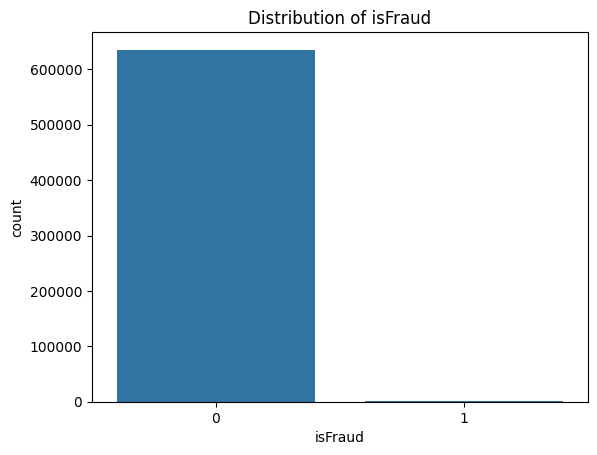

In [9]:
# Plotting the distribution
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of isFraud')
plt.show()

This dataset has a problem and that is the target class 'isFraud' is highly imbalanced , where the majority of the transactions are not fraudulent. So to address this imbalance we can do the following :
1. Oversampling the Minority Class
2. Undersampling the Majority Class
3. Using Class Weights
4. Anomaly Detection Models

In [10]:
# Splitting data into features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [11]:
missing_values = data.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [12]:
data.dropna(subset=['isFraud'], inplace=True)

In [13]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

import numpy as np

# Convert the Series object to a NumPy array
y_array = y.to_numpy()

# Reshape the NumPy array
y_array = y_array.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.2, random_state=42, stratify=y)

### Using SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Checking the distribution after SMOTE
print(y_train_res.value_counts())

isFraud
0    508352
1    508352
Name: count, dtype: int64


In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Data Visualizations**

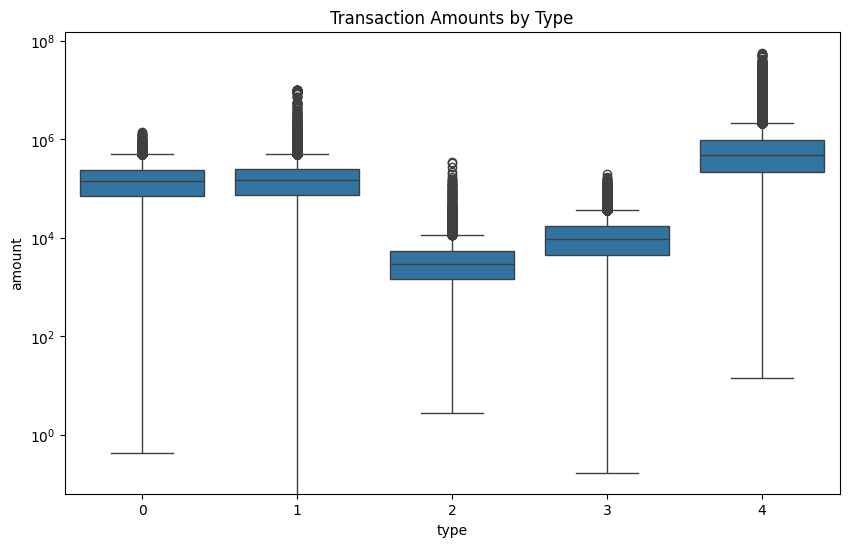

In [16]:
# Boxplot of transaction amounts by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=data)
plt.yscale('log')  # Use log scale due to large range of amounts
plt.title('Transaction Amounts by Type')
plt.show()

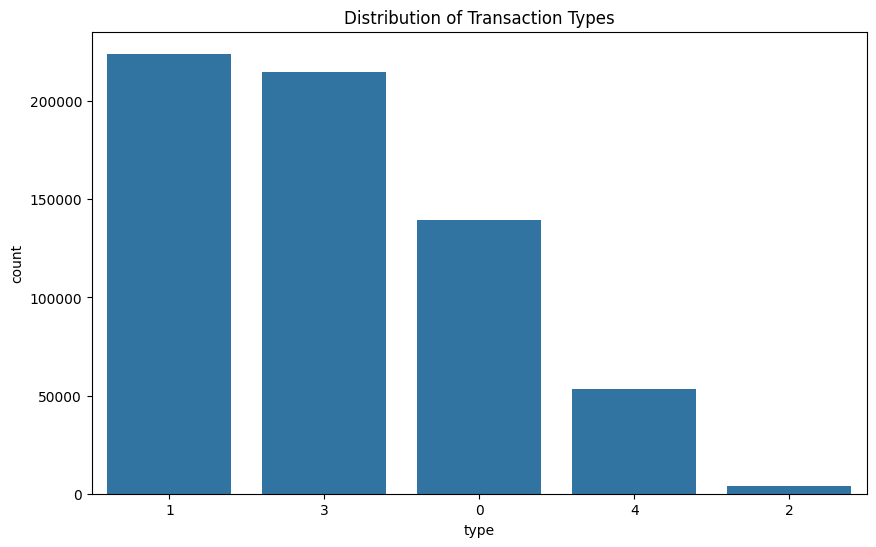

In [17]:
# Distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, order=data['type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.show()

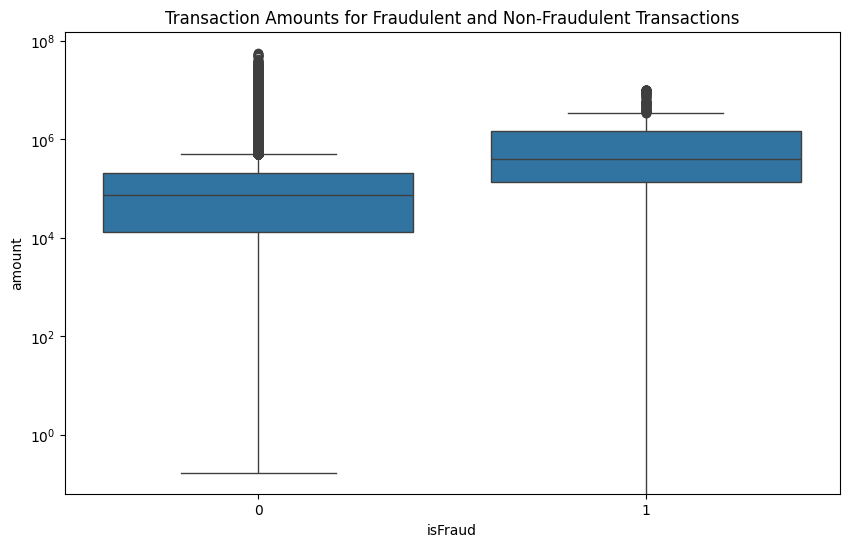

In [18]:
# Boxplot of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.yscale('log')  # Use log scale due to large range of amounts
plt.title('Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.show()

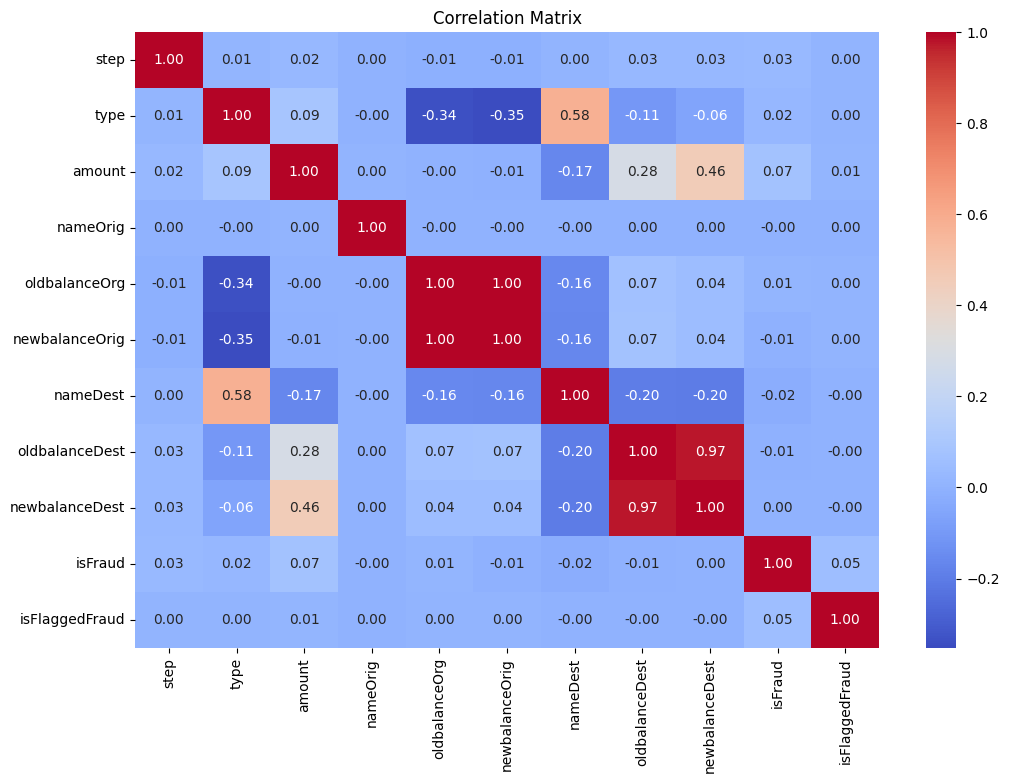

In [19]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Modelling and Evaluation**

### Logistic Regression

In [20]:
lr_model = LogisticRegression()

# Training Logistic Regression model
lr_model.fit(X_train, y_train)

# Predictions
lr_y_pred = lr_model.predict(X_test)

In [21]:
# Evaluation metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_classification_report = classification_report(y_test, lr_y_pred)

In [22]:
# Displaying evaluation metrics
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("ROC AUC:", lr_roc_auc)
print("Classification Report:\n", lr_classification_report)

Logistic Regression:
Accuracy: 0.9991198635788547
ROC AUC: 0.6615814316028579
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       0.98      0.32      0.49       164

    accuracy                           1.00    127253
   macro avg       0.99      0.66      0.74    127253
weighted avg       1.00      1.00      1.00    127253



#### **Analysis of Logistic Regression Model**
1. **Accuracy**: The model achieves an accuracy of approximately 99.91%, which indicates that it correctly predicts the class for nearly all instances in the test set.

2. **ROC AUC**: The ROC AUC score is approximately 0.66, indicating moderate discriminative power in distinguishing between the positive and negative classes.

3. **Precision and Recall (Class 1)**: The precision for class 1 is 0.98, meaning that out of all instances predicted as class 1, 98% are actually class 1. However, the recall for class 1 is only 0.32, indicating that the model correctly identifies only 32% of all actual class 1 instances. This suggests that the model is better at identifying non-fraudulent transactions than fraudulent ones.

4. **F1-score**: The F1-score for class 1 is 0.49, which is relatively low. It suggests that the model's ability to balance precision and recall for class 1 is not optimal.

**Logistic Regression:** *While the Logistic Regression model performs well in terms of accuracy, its ability to correctly identify fraudulent transactions (class 1) is relatively low, as indicated by its lower recall and F1-score for class 1.*

### **Random Forrest Classifier**

In [23]:
rf_model = RandomForestClassifier()

# Train Random Forest model
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

In [24]:
# Evaluating metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)

In [25]:
# Displaying evaluation metrics
print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("ROC AUC:", rf_roc_auc)
print("Classification Report:\n", rf_classification_report)


Random Forest:
Accuracy: 0.9996935239247797
ROC AUC: 0.8810975609756098
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       1.00      0.76      0.87       164

    accuracy                           1.00    127253
   macro avg       1.00      0.88      0.93    127253
weighted avg       1.00      1.00      1.00    127253



#### **Analysis of Random Forrest Classifier**
1. **Accuracy**: The Random Forest model achieves a higher accuracy of approximately 99.97%, slightly better than Logistic Regression.

2. **ROC AUC**: The ROC AUC score is significantly higher, around 0.88, indicating strong discriminative power.

3. **Precision and Recall (Class 1)**: The precision for class 1 is slightly lower than Logistic Regression at 0.99, indicating a high proportion of true positive predictions among all positive predictions. The recall for class 1 is 0.76, indicating that the model correctly identifies 76% of all actual class 1 instances. This suggests an improvement over Logistic Regression in identifying fraudulent transactions.

4. **F1-score**: The F1-score for class 1 is 0.86, indicating a good balance between precision and recall for class 1.

**Random Forrest** : *The Random Forest model outperforms Logistic Regression in terms of both accuracy and the ability to identify fraudulent transactions, as indicated by its higher ROC AUC, recall, and F1-score for class 1.*

### **XGBClassifier**

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initializing the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Training the model
xgb.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)
print(classification_report(y_test, y_pred))

Accuracy:  0.9997013822856828
ROC AUC:  0.9997260897826739
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       0.96      0.80      0.87       164

    accuracy                           1.00    127253
   macro avg       0.98      0.90      0.94    127253
weighted avg       1.00      1.00      1.00    127253



#### **Analysis of XGBClassifier**

**Binary Classification Model**: The model is performing binary classification, distinguishing between two classes : fraudulent (class 1) and non-fraudulent (class 0) transactions.

1. **Accuracy** : The model correctly predicts nearly all instances in the dataset.

2. **ROC AUC** :  A value of 99.97% indicates very high discriminatory power, meaning the model is excellent at differentiating between fraudulent and non-fraudulent transactions.

3. **Precesion & Recall** : A precision of 96% indicates that when the model predicts a transaction as fraudulent, it is correct 96% of the time.A recall of 80% indicates that the model correctly identifies 80% of all fraudulent transactions.

4. **F1-score (class 1)** : An F1-score of 87% for class 1 indicates a good balance between precision and recall, suggesting that the model performs well in identifying fraudulent transactions while minimizing false positives.

*Overall, based on these evaluation metrics, the model appears to be performing exceptionally well for the given binary classification task, particularly in detecting fraudulent transactions.*

### **Neural Network**

In [28]:
from sklearn.neural_network import MLPClassifier

# Initialize and train Neural Network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Displaying evaluation metrics
print("Neural Network:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", classification_report)

Neural Network:
Accuracy: 0.9994577730976872
ROC AUC: 0.7926789925784676
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       0.99      0.59      0.74       164

    accuracy                           1.00    127253
   macro avg       0.99      0.79      0.87    127253
weighted avg       1.00      1.00      1.00    127253



#### **Analysis of Neural Network**

1. **Accuracy** : With an accuracy of 99.95%, the model correctly predicts the class for the vast majority of instances in the dataset.

2. **ROC AUC** :  A value of 79.27% indicates moderate discriminatory power, meaning the model is fairly good at differentiating between fraudulent and non-fraudulent transactions, although not as high as desired.

3. **Precesion & Recall** : AWith a precision of 99%, when the model predicts a transaction as fraudulent, it is correct 99% of the time.A recall of 59% indicates that the model correctly identifies 59% of all fraudulent transactions.

4. **F1-score (class 1)** : An F1-score of 74% for class 1 indicates a balance between precision and recall. It suggests that the model performs relatively well in identifying fraudulent transactions while minimizing false positives.

*Overall, the model performs well, but there is room for improvement, particularly in increasing the recall for class 1 to capture more fraudulent transactions while maintaining a high precision.*

### **Metrics Evaluation**

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_r2 = r2_score(y_test, y_pred)
xgboost_mae = mean_absolute_error(y_test, y_pred)

neural_network_mse = mean_squared_error(y_test, y_pred)
neural_network_r2 = r2_score(y_test, y_pred)
neural_network_mae = mean_absolute_error(y_test, y_pred)

### **Evaluation Comaparison Table for all Models**

In [31]:
lr_results=pd.DataFrame(['Linear regression',lr_accuracy,lr_roc_auc,lr_mse,lr_r2,lr_mae]).transpose()
lr_results.columns = ['Method','Accuracy','ROC AUC','MSE','R2' ,'MAE']

rf_results=pd.DataFrame(['Random Forest Classifier',rf_accuracy,rf_roc_auc,rf_mse,rf_r2,rf_mae]).transpose()
rf_results.columns = ['Method','Accuracy','ROC AUC','MSE','R2' ,'MAE']

xgb_results=pd.DataFrame(['XGBClassifier',accuracy,roc_auc,xgboost_mse,xgboost_r2,xgboost_mae]).transpose()
xgb_results.columns = ['Method','Accuracy','ROC AUC','MSE','R2' ,'MAE']

nn_results=pd.DataFrame(['Neural Network',accuracy,roc_auc,neural_network_mse,neural_network_r2,neural_network_mae]).transpose()
nn_results.columns = ['Method','Accuracy','ROC AUC','MSE','R2' ,'MAE']

df_models=pd.concat([lr_results,rf_results,xgb_results,nn_results],axis=0)
df_models.reset_index(drop=True)
df_models

,Method,Accuracy,ROC AUC,MSE,R2,MAE
0,Linear regression,0.99912,0.661581,0.00088,0.316192,0.00088
0,Random Forest Classifier,0.999694,0.881098,0.000306,0.761888,0.000306
0,XGBClassifier,0.999458,0.792679,0.000542,0.578725,0.000542
0,Neural Network,0.999458,0.792679,0.000542,0.578725,0.000542


## **Result/Comparison Visualization**

<ipython-input-32-532c39488932>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Method', data=df_models, ax=axes[0, 0], palette="viridis")
<ipython-input-32-532c39488932>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC AUC', y='Method', data=df_models, ax=axes[0, 1], palette="viridis")
<ipython-input-32-532c39488932>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Method', data=df_models, ax=axes[1, 0], palette="viridis")
<ipython-input-32-532c39488932>:25: FutureWarning: 

Passing `palette` without 

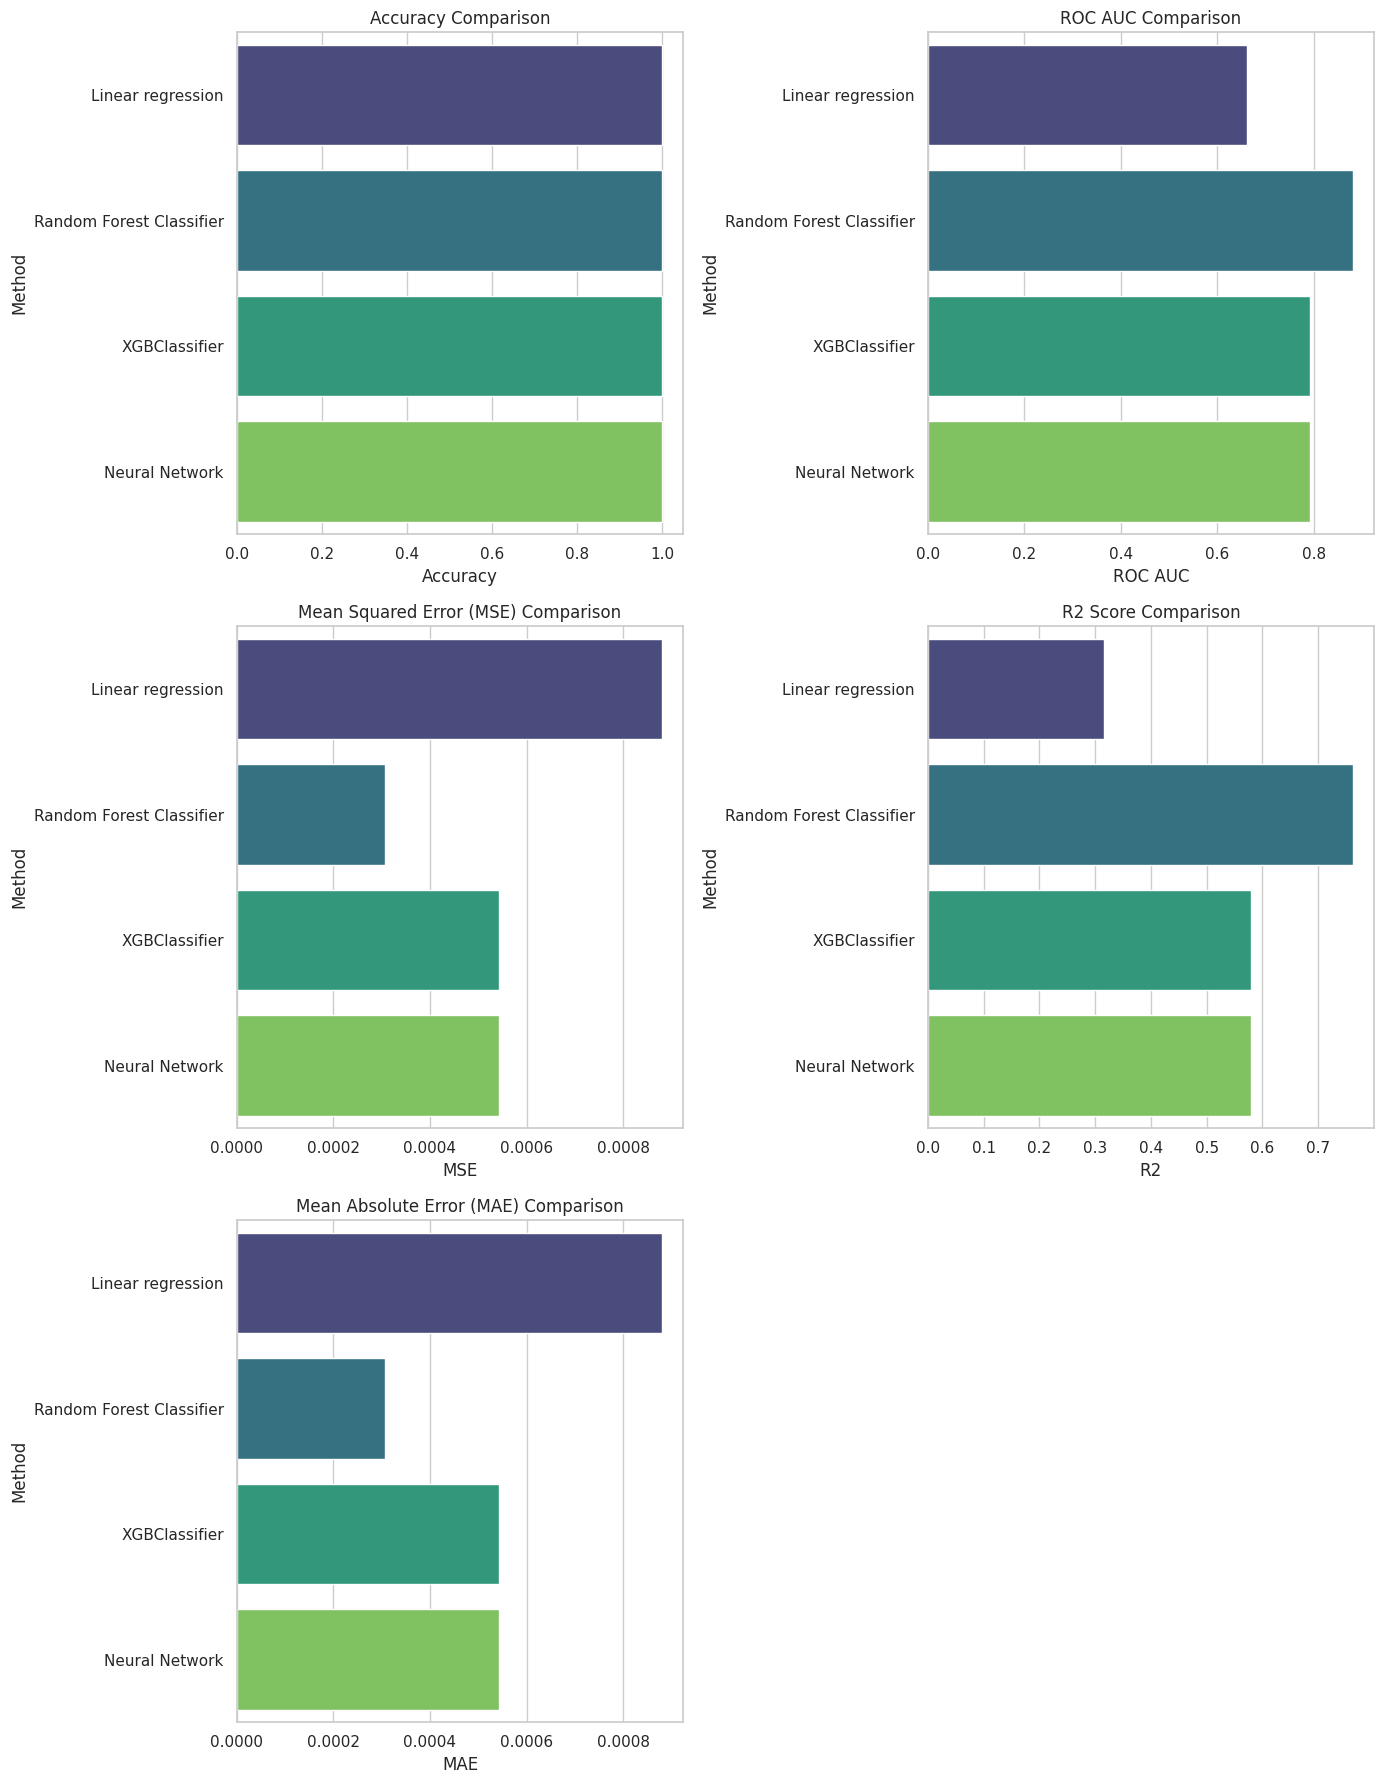

In [32]:
df_models = pd.concat([lr_results, rf_results, xgb_results, nn_results], axis=0)
df_models.reset_index(drop=True, inplace=True)

# Visualization using seaborn

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Accuracy Plot
sns.barplot(x='Accuracy', y='Method', data=df_models, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Accuracy Comparison')

# ROC AUC Plot
sns.barplot(x='ROC AUC', y='Method', data=df_models, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('ROC AUC Comparison')

# MSE Plot
sns.barplot(x='MSE', y='Method', data=df_models, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Mean Squared Error (MSE) Comparison')

# R2 Score Plot
sns.barplot(x='R2', y='Method', data=df_models, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('R2 Score Comparison')

# MAE Plot
sns.barplot(x='MAE', y='Method', data=df_models, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title('Mean Absolute Error (MAE) Comparison')

# Removing the empty subplot
fig.delaxes(axes[2, 1])

# Adjusting the spacing between subplots
plt.tight_layout()

# Show plot
plt.show()